**Корректность проверена на Python 3.7:**
+ numpy 1.14.5

# Доверительные интервалы для доли 

## Генерация данных

In [1]:
import numpy as np

In [2]:
print(np.__version__)

1.20.1


In [3]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

In [4]:
#истинное значение доли
statistical_population.mean()

0.49771

## Точечная оценка доли

In [5]:
random_sample.mean()

0.502

## Доверительный интервал для доли

In [6]:
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [7]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [8]:
proportion_confint(1, 50, alpha=0.05, method = 'normal')

(0.0, 0.05880530708179099)

In [9]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.471010, 0.532990] with width 0.061979


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [10]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

In [11]:
proportion_confint(1, 50, method = 'wilson')

(0.003539259271646236, 0.10495443589637815)

In [12]:
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.471062, 0.532922] with width 0.061860


## Размер выборки для интервала заданной ширины

In [13]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [14]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

9604

In [15]:
(samplesize_confint_proportion(0.02, 0.01))

752.9259288560489

In [16]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [17]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [18]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.481776, 0.501773] with width 0.019997


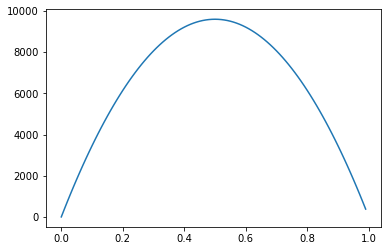

In [19]:
import matplotlib.pyplot as plt

x = np.arange(0.0, 1, 0.01)
y = (samplesize_confint_proportion(x, 0.01))

fig = plt.figure()
plt.plot(x, y)
plt.show()

In [20]:
(samplesize_confint_proportion(0.5, 0.01))

9603.647051735317

In [27]:
import scipy as sp
def my_proportion_confint(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1 / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = sp.stats.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp
my_proportion_confint(1, 50, alpha=0.05, method = 'normal')

(-0.018805307081790987, 0.05880530708179099)

In [25]:
sp.stats.norm.ppf((1+0.95)/2.)*(0.02*(1-0.02)/50)**0.5

0.038805307081790974

In [26]:
def my_proportion_confint(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = sp.stats.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

my_proportion_confint(1, 50, alpha=0.05, method = 'normal')

(-0.018805307081790987, 0.05880530708179099)